# Introduction

In this lab we will investigate W bosons produced in the LHC's 8 TeV proton proton collisions. These samples were produced 4 years ago in a fun experiment that opened up the option of performing low mass resonance searches at the LHC. The studies done then have led to a wealth of results from both LHC experiments, ATLAS and CMS. To understand how this study works, we first need to introduce a few concepts.

### W to QQ 
Let's first consider the process that we would like to look for. The production of W bosons in proton collisions. Here is a Feynman diagram of the process. 
<img src="images/Wqq.png" width="300"/>
The left part of the diagram represents the production of the W boson via some initial quark interaction (quarks and anti-quarks are present when two protons collide). At the right you have a gluon (bottom) that is produced in association with the W boson (top). At the top right, the W boson is decaying. It can decay to many things. The full list of W boson decays is [here](http://pdg.lbl.gov/2012/listings/rpp2012-list-w-boson.pdf), in the W branching ratios section. The quark label generically means that the W boson decays to two quarks. In the reference document this is equivalent to a decay to hadrons. 

Both quarks and gluons will decay into objects that we refer to as *jets*. A jet is collection of particles coming from an original quark or gluon. I will not explain the details of a jet, instead I will point you to summer school lectures I gave on this [here](https://indico.fnal.gov/event/11505/session/30/?slotId=0#20160820) (start from slide 36). 

### Lorentz boost 
This problem becomes interesting when the W boson has a high energy, or in other words it is boosted. In this case, the decays of the W are restricted to within a cone. A simple calculation of special relativity <font color='red'> that you should do </font> will give you that the maximum angular separation $\Delta \theta$ between the two decay products, can be described by:
\begin{eqnarray}
\Delta \theta & < & \frac{2m}{p}.
\end{eqnarray}
Where, $m$ is the mass and $p$ is the momentum of the resonance decaying, in this case the W boson. Thus, by taking $p$ to be sufficiently high, the angle $\theta$ is sufficiently small that we can resolve the two quark decays as one single jet cone instead of two separate jets. We will still take a large cone with $\Delta \theta_{max} = 0.8$. 
This means that our final state will look like this in the detector:
<img src="images/wjet.png" width="300"/>

*A small point about collisions at the LHC is that in place of momentum we often use a variable called transverse momentum or $\vec{p}_{T}$. This is the projection of $\vec{p}$ onto the plane perpendicular to the collision. This plane is particularly well understood since by transverse momentum conservation all collisions need to have $\sum_{i} \vec{p_{T}}^{i}=0$ for all resulting particles in the collision. For this analysis, you can effectively interchange $p$ and $\vec{p}_{T}$.* Some elementary introduction about detector's geometry can be found [here](https://www.lhc-closer.es/taking_a_closer_look_at_lhc/0.momentum).

### Backgrounds
Once we have a cone sufficient to detect both decay products we need to find a jet with two quarks. To find a jet with two quarks we need to remove our background processes, which are events that "look like" the interaction we want to find, from our events. Our main background process consists of the diagrams below:
<img src="images/dijet.png" width="600"/>
where quarks and gluons are produced by the strong force and manifest in the detector as jets. We call this background *multijet* or *QCD background*, which stands for Quantum Chromodynamics. Other sub-dominant background processes are the production of top quark pairs $t\bar{t}$, refered to as the *top quark background*, or the production of a pair of W or Z bosons, which we refer to as the *diboson background*.

### Other processes
There are additional processes that will produce a jet and gluon in the final state as well, which we might be interested in looking for as well. These are the production of Z bosons and Higgs bosons H. They are also resonances that may decay into a pair of quarks and can get reconstructed in one single jet cone - *but what is interesting is that they most often decay into a pair of b-quarks*. 

Besides its decay, one can use the mass of the resonance to distinguish between these signatures: the Z boson has a mass of $\sim 90~$GeV, the Higgs boson has a mass of $\sim 125~$GeV, while the W boson has a mass of $\sim 80.4~$GeV.

As a summary, our main background consists of either a quark or a gluon and our signal is a boson with 2 quarks inside. So the challenge is to *construct an identification algorithm of a jet that looks like it originated from two quarks*. 

# Loading data & Auxiliary functions

Before we start, let's define collider coordinates centered around the collision point. We tend to write our momentum 4 vector as $\vec{p}=(p_{T},\eta,\phi,m)$ in place of $\vec{p}=(p,\theta,\phi,m)$. You can read more in this short link [here](https://www.lhc-closer.es/taking_a_closer_look_at_lhc/0.momentum). 

Now is a good time to look at the data. Let's take a look at the different samples we have. The data can be downloaded from this link [here (3 GB)](https://www.dropbox.com/s/bcyab2lljie72aj/data.tgz?dl=0). And these extra files from  [here (130 MB)](https://www.dropbox.com/s/p756oa4mfw17lfw/data.zip?dl=0). Copy all of these in a directory called `data`.

If you are on a Mac/Linux machine you can use these commands (uncomment them before running) to download the data sets

In [4]:
#3GB Data Set
#!wget https://www.dropbox.com/s/bcyab2lljie72aj/data.tgz?dl=1

#130MB Data Set
#!wget https://www.dropbox.com/s/p756oa4mfw17lfw/data.zip?dl=1

In [5]:
# Extract the data
#!unzip data.zip?dl=1
#!tar -xvf data.tgz?dl=1

#Clean the downloaded file
#!rm data.zip?dl=1 data.tgz?dl=1 

Here are the different datasets:
* **Data**: *data/JetHT_s.root*. The 8 TeV JetHT dataset. This means that the data passed an online selection (trigger) that required the event to have jets. More on triggers below.
* **W(qq) simulation**: Here we have different options for a simulated qq=>W=>qq dataset
    * *data/WQQ_s.root*: 8 TeV collision energy (low number of events)
    * *data/skimh/WQQ_sh.root*: 13 TeV collision energy (high number of events but different collision energy). Can use these to train NNs and make nice plots.
    * *data/WQQ_new.root*: 8 TeV collision energy (newer dataset with not so high number of events)* 
* **Z(qq) simulation**: Again, we have different options for a simulated qq=>Z=>qq dataset
    * *data/ZQQ_s.root*: 8 TeV collision energy (low number of events)
    * *data/skimh/ZQQ_sh.root*: 13 TeV collision energy (high number of events but higher collision energy). Can use these to train NNs and make nice plots.
    * *data/ZQQ_new.root*: 8 TeV collision energy (newer dataset with not so high number of events)
* **H(bb) simulation**: *data/ggH.root*: This is a small simulated gg=>H=>bb dataset at 8 TeV collision energy. (we might need this in the future).
* **Multijet production or QCD background simulation**: *data/QCD_s.root*. This is our main background. And our worst modeled. We just call these backgrounds QCD because they are produced with Quantum chromodynamics.
* **Top quark pair production simulation**: *data/TT.root*. This is a background sample with top quark decays
* **Diboson simulation**: *data/WW.root,data/WZ.root,data/ZZ.root*. These are three rarer double W, W+Z and Z+Z diboson samples where we have two bosons instead of one.

In [47]:
# pre-requisites
# uproot High energy physics python file format: https://masonproffitt.github.io/uproot-tutorial/aio.html
import uproot
import numpy as np
import matplotlib.pyplot as plt
import os,sys

!pip install mplhep
# plotting style for High Energy physics 
import mplhep as hep
plt.style.use(hep.style.CMS)

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.


In [2]:
# Now let's open the data. 
wqq    = uproot.open("data/WQQ_s.root")["Tree"]
zqq    = uproot.open("data/ZQQ_s.root")["Tree"]
wqq13  = uproot.open("data/skimh/WQQ_sh.root")["Tree"]
zqq13  = uproot.open("data/skimh/ZQQ_sh.root")["Tree"]
wqq_n  = uproot.open("data/WQQ_8TeV_Jan11_r.root")["Tree"]
zqq_n  = uproot.open("data/ZQQ_8TeV_Jan11_r.root")["Tree"]
qcd    = uproot.open("data/QCD_s.root")["Tree"]
tt     = uproot.open("data/TT.root")["Tree"]
ww     = uproot.open("data/WW.root")["Tree"]
wz     = uproot.open("data/WZ.root")["Tree"]
zz     = uproot.open("data/ZZ.root")["Tree"]
ggh    = uproot.open("data/ggH.root")["Tree"]
data   = uproot.open("data/JetHT_s.root")["Tree"]

dataDict = {'qcd': qcd,
            'tt': tt,
            'data': data,
            'wqq': wqq,
            'zqq': zqq,
            'wqq13': wqq13,
            'zqq13': zqq13,
            'wqq_n': wqq_n,
            'zqq_n': zqq_n,
            'ww': ww,
            'zz': zz,
            'wz': wz,
            'ggh': ggh
            }
from collections import OrderedDict 

order_of_keys = ['data','qcd','tt','ww','zz','wz','wqq','wqq13','wqq_n','zqq','zqq13','zqq_n','ggh']
list_of_tuples = [(key, dataDict[key]) for key in order_of_keys]
OrdDataDict = OrderedDict(list_of_tuples)

# Exploring data 

Now, let's explore the data. There are a lot of different variables, but most of them will not used for this study. 
However, you should feel free to explore the different variables. For completeness, I will write a table of all of the different variables below: 

| sample   | book keeping variable | 
|------|------|
| run      | LHC run  period           |
| lumi     | LHC run period sub section | 
| event    | LHC collision id |
| trigger  | Bitmask of triggers that have been passed |  
| hltmatch | ??? (unused I think) | 
| puweight | Weight to match the beam inensity (so called Pileup) |
| npu      | For simulation the number of simulated pileup collisions | 
| npuPlusOne      | "" |
| npuMinusOne     | "" |
| nvtx            | Number of reconstructed vertices (a proxy for the total number of collisions) | 
| metFiltersWord  | Bitmask of whether event had anamalous detector features | 
| scale1fb        | The expected number of events per 1/fb of data | 
| rho             | energy density | 
| metRaw          | Raw Missing Transverse Energy (this is a proxy of the direction of invisible particles in the transverse plane | 
| metRawPhi       | Raw Missing Transverse Energy direction in transverse plane | 
| met             | Corrected metRaw | 
| metphi          | Correct metRawPhi | 
| tkmet           | charged metRaw | 
| tkmetphi        | charged metRawPhi | 
| mvamet          | ML  corrected metRaw |  
| mvametphi       | ML corrected metRawPhi | 
| puppet          | PUPPI corrected metRaw |
| puppetphi       | PUPPI corrected metRawPhi | 
| mt              | relativistic mass of (met+leading jet) in the transverse plane | 
| rawmt           | relativistic mass of (metRaw+leading jet) in the transverse plane | 
| tkmt            | relativistic mass of (tkmet+leading jet) in the transverse plane | 
| mvamt           | relativistic mass of (mvamet+leading jet) in the transverse plane | 
| puppetmt        | relativistic mass of (puppet+leading jet) in the transverse plane | 
| metSig          | probalbilistic measure missing transverse Energy is from 0 in sigma | 
| mvaMetSig       | probalbilistic mvamet is from 0 in sigma | 
| njets           | Number of jets with pt > 30 GeV | 
| nbtags          | Number of b-jets with pt > 30 GeV | 
| nfwd            | Number of jets with pt > 30 GeV and abs(eta) > 2.5 | 
| mindphi         | minimum direction in transverse plane of all jets and met | 
| j0_pt           | leading small jet pt | 
| j0_eta          | leading small jet $\eta$ | 
| j0_phi          | leading small jet $\phi$ | 
| j1_pt           | sub leading small jet pt | 
| j1_eta          | sub leading small jet $\eta$ | 
| j1_phi          | sub leading small jet $\phi$ | 
| j2_pt           | third highest leading small jet pt | 
| j2_eta          | third highest leading small jet $\eta$ | 
| j2_phi          | third leading small jet $\phi$ | 
| j0_mass         | leading jet mass | 
| j0_csv          | leading jet ML b-quark likelihood ML discriminator |
| j0_qgid         | leading jet quark vs gluon discrminator | 
| j0_chf          | leading jet charged particle fraction  |
| j0_nhf          | leading jet neutral (on photon) particle fraction  |
| j0_emf          | leading jet photon particle fraction  |
| j0_dphi         | delta $\phi$ w. respect to the sub-leading jet | 
| j1_mass         | subleading jet mass | 
| j1_csv          | subleading jet ML b-quark likelihood ML discriminator |
| j1_qgid         | subleading jet quark vs gluon discrminator | 
| j1_chf          | subleading jet charged particle fraction  |
| j1_nhf          | subleading jet neutral (on photon) particle fraction  |
| j1_emf          | subleading jet photon particle fraction  |
| j1_dphi         | delta $\phi$ w. respect to the leading jet  | 
| j2_mass         | third highest jet mass | 
| j2_csv          | third highest ML b-quark likelihood ML discriminator |
| j2_qgid         | third highest jet quark vs gluon discrminator | 
| j2_chf          | third highest jet charged particle fraction  |
| j2_nhf          | third highest jet neutral (on photon) particle fraction  |
| j2_emf          | third highest jet photon particle fraction  |
| j2_dphi         | delta $\phi$ w. respect to the closest jet  | 
| dj0_pt          | Lead and sub leading jets combined 4-vector pt  | 
| dj0_mass        | Lead and sub leading jets combined 4-vector mass | 
| dj0_phi         | Lead and sub leading jets combined 4-vector $phi$ | 
| dj0_y           | Lead and sub leading jets combined 4-vector rapidity | 
| dj0_qgid        | Lead and sub leading jets combined quark gluon| 
| dj0_csv         | Lead and sub leading jets combined b-quark discriminator | 
| dj0_jdphi       | Lead and sub leading jets difference in transverse plane | 
| nvjet           | number of fat jets | 
| vjet0_pt        | fat jet pt | 
| vjet0_eta       | fat jet $\eta$ | 
| vjet0_phi       | fat jet $\phi$ | 
| vjet0_mass      | fat jet mass | 
| vjet0_csv       | fat jet b-tag probability | 
| vjet0_flavor    | fat jet flavor id (if simulation) | 
| vjet0_t1        | fat jet $\tau_{1}$ | 
| vjet0_t2        | fat jet $\tau_{2}$ | 
| vjet0_t3        | fat jet $\tau_{3}$ | 
| vjet0_msd0      | fat jet soft drop mass $\beta=0$ |
| vjet0_msd1      | fat jet soft drop mass $\beta=1$ |
| vjet0_mprune    | fat jet pruned mass |
| vjet0_mtrim     | fat jet pruned mass |
| vjet0_pullAngle | fat jet color flow variable between quarks |
| vjet0_sj1_csv   | fat jet highest momentum subjet b-tag ML discriminator | 
| vjet0_sj2_csv   | fat jet subleading momentum subjet b-tag ML discriminator | 
| vjet0_sj1_qgid  | fat jet highest momentum subjet quark gluon likelihood | 
| vjet0_sj2_qgid  | fat jet subleading momentum subjet quark gluon likelihood | 
| vjet0_sj1_q     | fat jet highest momentum subjet charge  | 
| vjet0_sj2_q     | fat jet highest momentum subjet charge  | 
| vjet0_sj1_z     | fat jet highest momentum subjet energy relative to fat jet  | 
| vjet0_sj2_z     | fat jet subleading momentum subjet energy relative to fat jet  | 
| vjet0_iso15     | fat jet isolation with 1.5 cone | 
| vjet0_c2b0      | fat jet  $C_{2}^{\beta=0}$ correlation function for two likelihood |  
| vjet0_c2b0P2    | fat jet $C_{2}^{\beta=0.2}$ correlation function for two likelihood |  
| vjet0_c2b0P5    | fat jet $C_{2}^{\beta=0.5}$ correlation function for two likelihood |  
| vjet0_c2b1P0    | fat jet $C_{2}^{\beta=1.0}$ correlation function for two likelihood |  
| vjet0_c2b2P0    | fat jet $C_{2}^{\beta=2.0}$ correlation function for two likelihood |  
| vjet0_qjet      | fat jet quantum jet volatility |  
| vjet0_trig      | fat jet trigger matched | 
| vjet0_genm      | fat jet simulated mass (if matched to a jet) |
| vjet0_genV      | ??? |
| nmuons          | number of muons | 
| mu0_pt          | Leading Muon  pt | 
| mu0_eta         | Leading Muon $\eta$ | 
| mu0_phi         | Leading Muon $\phi$ | 
| dm0_pt          | dimuon combined 4-vector pt | 
| dm0_mass        | dimuon combined 4-vector relativistic mass | 
| dm0_phi         | dimuon combined 4-vector $\phi$ | 
| dm0_y           | dimuon combined 4-vector rapidity | 
| nelectrons      | number of electrons | 
| e0_pt           | leading electron pt | 
| e0_eta          | leading electron $\eta$ |  
| e0_phi          | leading electron $\phi$ |
| ntaus           | number of hadronic $\tau_{h}$ | 
| tau0_pt         | leading $\tau_{h}$ $p_{T}$ |
| tau0_eta        | leading $\tau_{h}$ $\eta$ |
| tau0_phi        | leading $\tau_{h}$ $\phi$ |
| nphotons        | number of additional photons | 
| pho0_pt         | leading photon $p_{T}$ |
| pho0_eta        | leading photon $\eta$ |
| pho0_phi        | leading photon $\phi$ |

Now all of these variables are not needed. In this selection we will focus on what we call "fat jets". The labels there given by `vjet_`. Fat jets are large cone jets that are reconstructed with a large radius $\Delta\theta$ to ensure that both quarks are in the cone. To isolate a single collision we also are applying the PUPPI algorithm (you can ask me about this). You should focus on the `vjet` variables for this project. 

In [5]:
# You can view all of these variables using the `keys` option
wqq.keys()

['sample',
 'run',
 'lumi',
 'event',
 'trigger',
 'hltmatch',
 'puweight',
 'npu',
 'npuPlusOne',
 'npuMinusOne',
 'nvtx',
 'metFiltersWord',
 'scale1fb',
 'rho',
 'metRaw',
 'metRawPhi',
 'met',
 'metphi',
 'tkmet',
 'tkmetphi',
 'mvamet',
 'mvametphi',
 'puppet',
 'puppetphi',
 'mt',
 'rawmt',
 'tkmt',
 'mvamt',
 'puppetmt',
 'metSig',
 'mvaMetSig',
 'njets',
 'nbtags',
 'nfwd',
 'mindphi',
 'j0_pt',
 'j0_eta',
 'j0_phi',
 'j1_pt',
 'j1_eta',
 'j1_phi',
 'j2_pt',
 'j2_eta',
 'j2_phi',
 'j0_mass',
 'j0_csv',
 'j0_qgid',
 'j0_chf',
 'j0_nhf',
 'j0_emf',
 'j0_dphi',
 'j1_mass',
 'j1_csv',
 'j1_qgid',
 'j1_chf',
 'j1_nhf',
 'j1_emf',
 'j1_dphi',
 'j2_mass',
 'j2_csv',
 'j2_qgid',
 'j2_chf',
 'j2_nhf',
 'j2_emf',
 'j2_dphi',
 'dj0_pt',
 'dj0_mass',
 'dj0_phi',
 'dj0_y',
 'dj0_qgid',
 'dj0_csv',
 'dj0_jdphi',
 'nvjet',
 'vjet0_pt',
 'vjet0_eta',
 'vjet0_phi',
 'vjet0_mass',
 'vjet0_csv',
 'vjet0_flavor',
 'vjet0_t1',
 'vjet0_t2',
 'vjet0_t3',
 'vjet0_msd0',
 'vjet0_msd1',
 'vjet0_mprune',

## Weights of the simulated data 

Before we look at the simulated data, we need to understand how we weight our simulation. 

The weights can be written out as 
\begin{eqnarray}
w_{tot} & = & \rm{total data} \times \frac{\sigma}{N_{\rm{events}}} \times w_{PU}
\end{eqnarray}

We apply three weights:
* The total data is defined as the total amount data in our sample. To compute this we quote our data in units of $fb^{-1}$. This is a "femto-barn" where a barn is $10^{-28}m^{2}$, a volume of area (that rumour has it Enrico Fermi claimed was as big as a barn).  
 **The total luminosity collected for 8 TeV data was 18.3 $fb^{-1}$.** This translated to 18300 $pb^{-1}$ (picobarns).

* Our next weight is the cross section, $\sigma$ divided over the number of generated events. $\sigma$ is the interaction cross section of the process. We save this ratio in units of $fb$ so that it cancels with our total data "luminosity". In our data files this weight is saved as `scale1fb`. *Note: In most of our data files this variable is saved in units of $pb$ so we need to multiply by an extra factor of 1000. This extra factor of 1000 does not apply for the new wqq_n and zqq_n samples.*

* Lastly, we apply a pileup weight, $w_{PU}$ to match the simulated beam intensity. Pileup stands for the additional interactions between protons when two proton bunches collide at the LHC. This has an effect at modifying the simulation in a certain way. We account for this with the variable ` puweight` saved in our data files.

Therefore we expect a list of weights such as the following:
```weights=[1000*18300,"puweight","scale1fb"]```
where the first element of the list is a *fixed scaling number* and the *last two are variable weights* saved in our files.

In [6]:
# these are the standard weights
weights=[1000*18300,"puweight","scale1fb"]

def get_weights(weights,mask,key):
    # the first element of the list is the scaling weight
    weight = weights[0]
    # this needs to be divided by 1000 if the sample is wqq_n or zqq_n
    if key=='wqq_n' or key=='zqq_n': 
        print('divide weight by 1000.')
        weight /= 1000.
    if key=='ggh': weight /= 1000. #maybe ggh too?
    # now let's loop over the following weights
    for i in range(1,len(weights)):
        weight *= OrdDataDict[key].arrays(weights[i], library="np")[weights[i]][mask]
    return weight

# For our samples with different collision energy (13 TeV) we need to perform a little hack on the cross section weight
# so we normalize them to the number of events of the 8 TeV collision energy samples after a simple mask

#This computes the integral of weighted events assuming a basic mask (see below details of this basic selection)
def integral(iData,iWeights,iKey):
    def selection(iData):
        trigger = (iData.arrays('trigger', library="np")["trigger"].flatten() > 0) # trigger selection
        jetpt   = (iData.arrays('vjet0_pt', library="np")["vjet0_pt"].flatten() > 400) # require jet pT above certain threshold
        allcuts = np.logical_and.reduce([trigger,jetpt]) # apply both masks at the same time
        return allcuts
    mask_sel=selection(iData)
    # get weights and take the integral and return it
    weight = get_weights(iWeights,mask_sel,iKey)
    return np.sum(weight)

def scale(iData8TeV,iData13TeV,iWeights,iKey8TeV,iKey13TeV):
    int_8TeV  = integral(iData8TeV,iWeights,iKey8TeV)
    int_13TeV = integral(iData13TeV,iWeights,iKey13TeV)
    print("Scale %s:"%iKey13TeV,'ratio: ',int_8TeV/int_13TeV,' 8 TeV integral: ',int_8TeV,' 13 TeV integral: ',int_13TeV)
    return int_8TeV/int_13TeV

# we define this extra scaling number as:
wscale=scale(wqq,wqq13,weights,'wqq','wqq13')
zscale=scale(zqq,zqq13,weights,'zqq','zqq13')

#w_nscale=scale(wqq,wqq_n,[18300,"puweight","scale1fb"],'wqq','wqq_n')
#z_nscale=scale(zqq,zqq_n,[18300,"puweight","scale1fb"],'zqq','zqq_n')

# Note: you could apply this weight function such as
# qcd: get_weights(weights,qcd_mask,'qcd')
# wqq_13: get_weights(weights,w_mask,'wqq_13')*wscale

Scale wqq13: ratio:  1.6836067433254933  8 TeV integral:  14748.133987809199  13 TeV integral:  8759.844925946538
Scale zqq13: ratio:  0.6932541250123121  8 TeV integral:  5663.988480165775  13 TeV integral:  8170.147534376638


Now let's make some quick plotting functions. 
See the comments on how it works, but it should be pretty straightforward. 

In [7]:
# define some labels and colors
labels = {'qcd': 'QCD',
          'wqq': 'W',
          'zqq': 'Z',
          'wqq13': 'W (13 to 8 TeV)',
          'zqq13': 'Z (13 to 8 TeV)',
          'wqq_n': 'W new',
          'zqq_n': 'Z new',
          'tt': 'tt',
          'ggh': 'H',
          'zz': 'ZZ',
          'ww': 'WW',
          'wz': 'WZ',
          'data': 'Data',
         }
colors = {'qcd': 'orange',
          'wqq': 'royalblue',
          'zqq': 'r',
          'wqq13': 'cornflowerblue',
          'zqq13': 'salmon',
          'wqq_n': 'lightsteelblue',
          'zqq_n': 'lightcoral',
          'tt': 'green',
          'ggh': 'cyan',
          'zz': 'purple',
          'ww': 'brown',
          'wz': 'crimson',
          'data': 'black',
         }

# build a plot to compare/stack histograms
def histErr(iVar,iLabel,iBins,iMin,iMax,iSims,iMasks,iData=None,iMaskData=None,
            iLabels=None,iColors=None,
            iDensity=True,iStack=False,iWeights=None):
    fig, ax = plt.subplots(1,1,figsize=(6,6),dpi=80)

    # first plot the simulated data - build arrays
    if isinstance(iSims,dict): # if iSims is a dict
        simhists = [x.arrays(iVar, library="np")[iVar][iMasks[key]] for key,x in iSims.items()] 
    else: # if it's a list
        simhists = [iSims[i].arrays(iVar, library="np")[iVar][iMasks[i]] for i in range(0,len(iSims))]
        
    # define labels
    plot_labels = iLabels
    if iLabels is None:
        plot_labels = [labels[lk] for lk in list(iSims.keys())] #labels
    plot_colors = iColors
    if iColors is None:
        plot_colors = [colors[lk] for lk in list(iSims.keys())] # colors
    
    # build the histogram weights
    hist_weights = None
    if iWeights:
        hist_weights = [get_weights(weights,iMasks[key],key) for key in iSims.keys()]
        if 'wqq13' in key:
            hist_weights *= wscale
        if 'zqq13' in key:
            hist_weights *= zscale
        
    htype = 'bar'
    if not iStack: htype='step'
        
    _,bins,_ = plt.hist(simhists,
                        color=plot_colors, label=plot_labels, weights=hist_weights,
                        range=(iMin,iMax), bins=iBins, alpha=.6, histtype=htype, 
                        density=iDensity,stacked=iStack)
    
    # now include the data points (if any)
    if iData:
        data = iData.arrays(iVar, library="np")[iVar][iMaskData]
        counts, binEdges = np.histogram(data,bins=iBins,range=(iMin,iMax),density=iDensity)
        yerr = np.sqrt(counts) # let's apply Poisson uncertainties
        if iDensity: yerr /= np.sqrt(sum(iMaskData)*(binEdges[1]-binEdges[0]))
        binCenters = (binEdges[1:]+binEdges[:-1])*.5
        plt.errorbar(binCenters, counts, yerr=yerr,fmt="o",c="k",label="Data", ms=3)
    
    #if iDensity:
    #   plt.ylim(0,0.015)
    
    plt.legend(prop={'size': 10})
    plt.xlabel(iLabel)
    if iDensity: plt.ylabel("Normalized Counts") 
    else: plt.ylabel("Counts")
    plt.show()


# Event Selection

Let's talk about to perform the selection of events. 

The dataflow at the LHC is complicated, but we can simplify it to the following diagram. Here I show it for ATLAS, but for CMS its basically the same. 

<img src="images/atlas-data-flow.png" width="600"/>

We will work with the right part of the plot (*ntuples*). The samples that we are using are called *ntuples*, since they have *n* variables. 

The top part of this diagram tells us how the data initially comes from the detector. We usually call it "trigger and DAQ" (DAQ = Data Acquisition). The trigger look at the features of the event **in a fast way** to see if the event is interesting. If the event is interesting we keep it. If it is not, we throw it away. 

*Triggers* can be quite complicated because they have to process a lot of data really fast. The first layer of the trigger takes in data at a rate of 20 MHz (With 13 TeV collisions this increased to 40 MHz). This translates to about 50 terabytes/s, which is the most amount of data in any single system. To process the data quickly, we use specialized (*FPGAs*)(Field-programmable gate arrays) to look at the data quickly and determine if it is interesting. Because we can only take a cursory look at the data, we sometimes make a mistake. This means that with the final reconstructed parameters the trigger will change. To understand how the trigger works let's plot some data.

In our dataset, we have saved different trigger selections that require at least one *fat jet* with *different energy or transverse momentum*. So let's explore these trigger selections.

/Users/pharris/Library/Python/3.7/lib/python/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


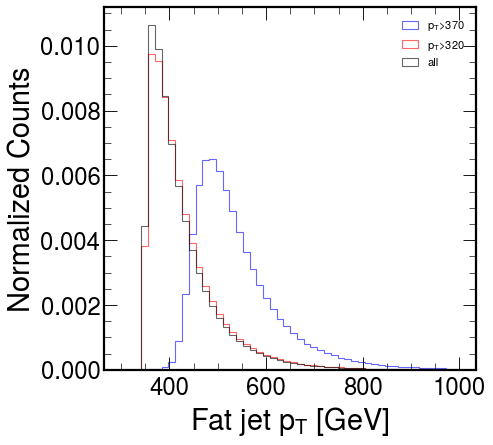

/Users/pharris/Library/Python/3.7/lib/python/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


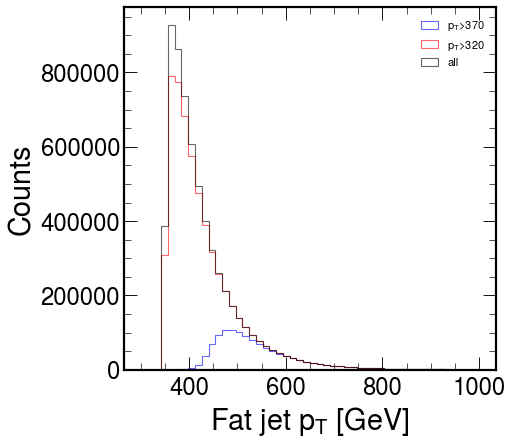

In [8]:
# Let's select some data (note that trigger can only be > 0)

# First let's build masks on our data - these will be boolean arrays
alldata      = (dataDict['data'].arrays('trigger', library="np")["trigger"].flatten() >= -1000000)
triggerdata1 = (dataDict['data'].arrays('trigger', library="np")["trigger"].flatten() % 2 > 0) #let's require the lowest trigger jet pT > 320
triggerdata2 = (dataDict['data'].arrays('trigger', library="np")["trigger"].flatten() % 4 > 1) #let's require one of our standard triggers (jet pT > 370 )

# Now let's make a plot of the fat jet pt  
# normalized
histErr('vjet0_pt','Fat jet $p_T$ [GeV]',50,300,1e3,
        [dataDict['data'],dataDict['data'],dataDict['data']],
        [alldata,triggerdata1,triggerdata2],
        iLabels=['all','$p_T$>320','$p_T$>370'],
        iColors=['black','red','blue'],
        iDensity=True,iStack=False,iWeights=None)

# and without density
histErr('vjet0_pt','Fat jet $p_T$ [GeV]',50,300,1e3,
        [dataDict['data'],dataDict['data'],dataDict['data']],
        [alldata,triggerdata1,triggerdata2],
        iLabels=['all','$p_T$>320','$p_T$>370'],
        iColors=['black','red','blue'],
        iDensity=False,iStack=False,iWeights=None)

#So you can see as you cut tighter, you get much less jets, but the data will be cleaner (I suggest triggerdata1)

## Mitigating background 

Now, we want to know how to separate our two prong signal jets from one prong background jets. There are some variables in our data that can be used to distinguish these. To make this simple, we are just going to go over the most basic ones. That way you can get a feel for how to identify two prong and one prong jets. Your challenge will be to explore how to do this. 

### Jet Substructure

**Groomed Mass**. Jet Grooming is a very powerful tool to clean up the resolution of the mass of jet. The idea is just like how you would groom a bush. The strategy is to take a jet and remove radiative gluons off of quarks. This spurious, soft (small energy), and wide-angle radiation can effectively broaden the mass of a jet. 

The way that grooming is done is by iterating down and remove clusters of quarks and gluons that have low energy and are far away from the central axes of the quark/gluon. Practially speaking this removes radiation away from the original quark and gluon direction. The details of how this works has deep physical meaning, which I will not go through here. What you should take away is that this is an iterative algorithm that is approximate, not perfect, but helps. 

There are many grooming algorithms. The main ones that we use are trimming, pruning, filtering, and soft drop (with various beta parameters). Typically at the LHC we use soft drop with $\beta=0$. Let's look at how it affects our background (QCD) and our W to quarks signal. 

In [46]:
mask=wqq.arrays('vjet0_pt')["vjet0_pt"] > 400
tau2=wqq.arrays('vjet0_t2')["vjet0_t2"][mask]
tau1=wqq.arrays('vjet0_t1')["vjet0_t1"][mask]
print(tau1[tau2/tau1 > 0.4])

#mask=wqq.arrays('vjet0_pt')["vjet0_pt"] > 500
#plt.hist(wqq.arrays('vjet0_msd0')["vjet0_msd0"][maskt2t1])

[0.245, 0.256, 0.347, 0.287, 0.228, 0.382, ... 0.352, 0.164, 0.687, 0.355, 0.261]


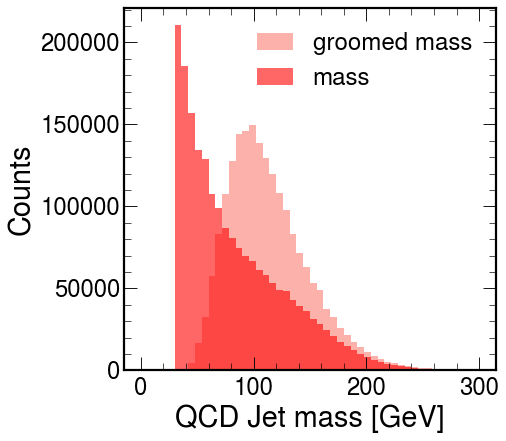

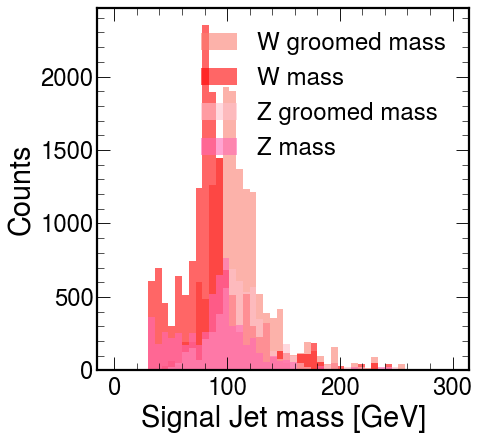

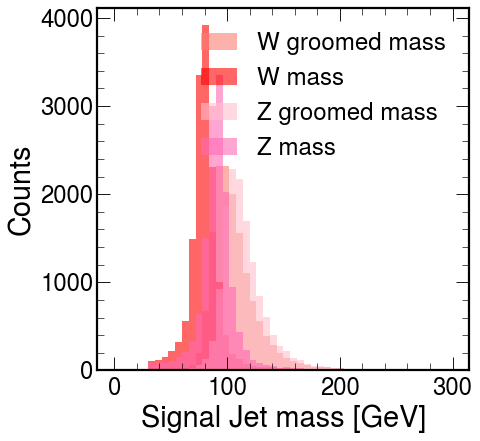

In [9]:
# First let's define a quick selection (a simple pT cut of 400 GeV and a 320 GeV trigger)
def selection(iData):
    #lets apply a trigger selection
    trigger = (iData.arrays('trigger', library="np")["trigger"].flatten() > 0)
    #Now lets require the jet pt to be above a threshold
    jetpt   = (iData.arrays('vjet0_pt', library="np")["vjet0_pt"].flatten() > 400)
    standard_trig = (iData.arrays('trigger', library="np")["trigger"].flatten() % 2 > 1) #lets require one of our standard triggers (jet pT > 320 )
    # standard_trig = (iData.arrays('trigger', library="np")["trigger"].flatten() % 4 > 1) #lets require one of our standard triggers (jet pT > 370 )
    allcuts = np.logical_and.reduce([trigger,jetpt])
    return allcuts

print(wqq.arrays())
# Let's look at all the data files (except the 8 TeV W and Z samples - let's work with the 13 TeV ones)
myDataDict = OrdDataDict.copy()
del myDataDict['wqq_n']
del myDataDict['zqq_n']
del myDataDict['data']

# Get masks for the selection defined above (both for simulated datasets and data)
masks = {}
for key in myDataDict: masks[key] = selection(myDataDict[key])
maskData = selection(dataDict['data'])

# Now let's plot the mass and the groomed mass (msd0) for the QCD background
fig, ax = plt.subplots(1,1,figsize=(6,6),dpi=80)
plt.hist(qcd.arrays('vjet0_mass', library="np")["vjet0_mass"][masks['qcd']],weights=get_weights(weights,masks['qcd'],'qcd'),
         bins=50,range=(0,300), color='salmon',label="groomed mass", alpha=.6)
plt.hist(qcd.arrays('vjet0_msd0', library="np")["vjet0_msd0"][masks['qcd']], weights=get_weights(weights,masks['qcd'],'qcd'),
         bins=50,range=(0,300), color='red',label="mass", alpha=.6)
plt.legend()
plt.xlabel("QCD Jet mass [GeV]")
plt.ylabel("Counts")
plt.show()

# Let's look at the W/Z samples now (8 TeV collision energy)
fig, ax = plt.subplots(1,1,figsize=(6,6),dpi=80)
plt.hist(myDataDict['wqq'].arrays('vjet0_mass', library="np")["vjet0_mass"][masks['wqq']],weights=get_weights(weights,masks['wqq'],'wqq'),
         bins=50,range=(0,300), color='salmon',label="W groomed mass", alpha=.6)
plt.hist(myDataDict['wqq'].arrays('vjet0_msd0', library="np")["vjet0_msd0"][masks['wqq']], weights=get_weights(weights,masks['wqq'],'wqq'),
         bins=50,range=(0,300), color='red',label="W mass", alpha=.6)
plt.hist(myDataDict['zqq'].arrays('vjet0_mass', library="np")["vjet0_mass"][masks['zqq']],weights=get_weights(weights,masks['zqq'],'zqq'),
         bins=50,range=(0,300), color='pink',label="Z groomed mass", alpha=.6)
plt.hist(myDataDict['zqq'].arrays('vjet0_msd0', library="np")["vjet0_msd0"][masks['zqq']], weights=get_weights(weights,masks['zqq'],'zqq'),
         bins=50,range=(0,300), color='hotpink',label="Z mass", alpha=.6)
plt.legend()
plt.xlabel("Signal Jet mass [GeV]")
plt.ylabel("Counts")
plt.show()

# Let's look at the W/Z samples now (13 TeV collision energy)
# Note that in the weights we need to multiply by wscale
fig, ax = plt.subplots(1,1,figsize=(6,6),dpi=80)
plt.hist(myDataDict['wqq13'].arrays('vjet0_mass', library="np")["vjet0_mass"][masks['wqq13']],weights=get_weights(weights,masks['wqq13'],'wqq13')*wscale,
         bins=50,range=(0,300), color='salmon',label="W groomed mass", alpha=.6)
plt.hist(myDataDict['wqq13'].arrays('vjet0_msd0', library="np")["vjet0_msd0"][masks['wqq13']], weights=get_weights(weights,masks['wqq13'],'wqq13')*wscale,
         bins=50,range=(0,300), color='red',label="W mass", alpha=.6)
plt.hist(myDataDict['zqq13'].arrays('vjet0_mass', library="np")["vjet0_mass"][masks['zqq13']],weights=get_weights(weights,masks['zqq13'],'zqq13')*wscale,
         bins=50,range=(0,300), color='pink',label="Z groomed mass", alpha=.6)
plt.hist(myDataDict['zqq13'].arrays('vjet0_msd0', library="np")["vjet0_msd0"][masks['zqq13']], weights=get_weights(weights,masks['zqq13'],'zqq13')*wscale,
         bins=50,range=(0,300), color='hotpink',label="Z mass", alpha=.6)
plt.legend()
plt.xlabel("Signal Jet mass [GeV]")
plt.ylabel("Counts")
plt.show()

What you observe is that the mass for our qcd background goes down to much lower values, and the mass for W boson gets more narrow and approaches the mass of the W boson (80.4 GeV).  This is a great way to reduce the background and improve the sensitivity of the signal. 

Now lets look at another class of variables. These variables are the n-subjettiness variables. These variables were developed at MIT by Prof. Thaler and a UROP. The original paper is [here](https://arxiv.org/abs/1011.2268). Each of these variables compute the likelihood of a certain number of prongs, or the likelihood that a certain number of sub-jets exist in the shower. 

We write these variables as $\tau_{i}$, with $\tau_{1}$ being the likelihood for 1 pronged jet, $\tau_{2}$ a two pronged and so on. To test these variables we use the ratios as a way to measure the likelihood of $N$ prongs vs $M$ prongs. To look for W and Z bosons, we look for the ratio of 2 prongs with respect to one. Hence, we consider the variable $\tau_{2}/\tau_{1}$. 

Let's now look at how this variable behaves between our signal simulation and our background. 

2792748


ValueError: weights should have the same shape as x

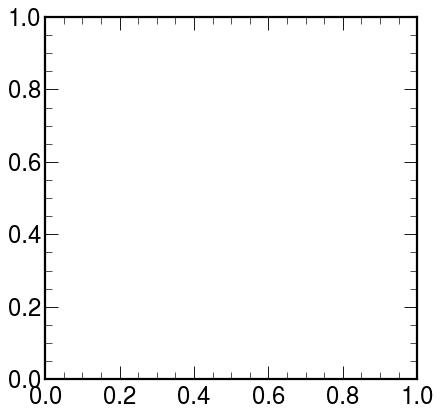

In [16]:
# Compute the t21 ratio
# let's use the same selection set above
# note that here we are going to use our 13 TeV signal samples
print(len(masks["qcd"]))

fig, ax = plt.subplots(1,1,figsize=(6,6),dpi=80)
qcdt21 = (qcd.arrays('vjet0_t2', library="np")["vjet0_t2"][masks['qcd']]/
          qcd.arrays('vjet0_t1', library="np")["vjet0_t1"][masks['qcd']])
wt21 = (wqq13.arrays('vjet0_t2', library="np")["vjet0_t2"][masks['wqq13']]/
          wqq13.arrays('vjet0_t1', library="np")["vjet0_t1"][masks['wqq13']])

plt.hist(qcdt21, weights=get_weights(weights,masks['qcd'],'qcd'),
         bins=50, color='red',label="QCD", alpha=.6, density=True)
plt.hist(wt21, weights=get_weights(weights,masks['wqq13'],'wqq13')*wscale,
         bins=50, color='black',label="W", alpha=.6, density=True)
plt.legend()
plt.xlabel(r"$\tau_{21}$")
plt.ylabel("Normalized Counts")
plt.show()

What you can see is that our two pronged signal has a lower $\tau_{2}/\tau_{1}$ the chance of the background is low. So by requiring $\tau_{2}/\tau_{1} < X$ we can isolate two pronged signals over the background. 

# Data vs Simulation

Now, lets try to find the $W\rightarrow qq$ and $Z\rightarrow qq$ peak in the data. This is a difficult problem and you will have to use the above ideas plus a few others. To give you a hint you should read [this paper](https://arxiv.org/abs/1603.00027). Also, you should consider all of the other physics papers based on this strategy. That includes our [original paper](https://arxiv.org/abs/1705.10532) and two follow-up papers [here](https://arxiv.org/abs/1710.00159) and  [here](https://arxiv.org/abs/1909.04114). These later papers use more technology developed along the same lines, but the original paper should have all you need to get a resonance. 

To put it all together, we want to make a data vs simulation  plot. For this will take all of our simulations and add them together. Let's make a simple plotting example.

/Users/pharris/Library/Python/3.7/lib/python/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


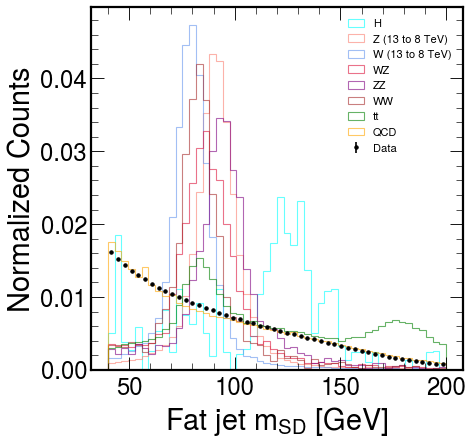

/Users/pharris/Library/Python/3.7/lib/python/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


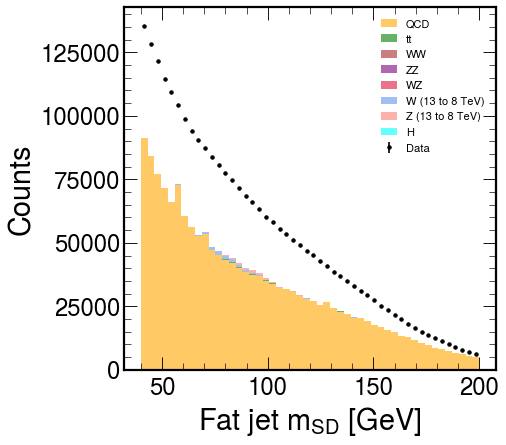

In [10]:
try:
    del myDataDict['wqq'] #let's omit 8 TeV samples from here
    del myDataDict['zqq']
except:
    print('samples already deleted')
    
# let's compare shapes
histErr('vjet0_msd0','Fat jet $m_{SD}$ [GeV]',50,40,200,
        myDataDict,masks,
        dataDict['data'],maskData,
        iDensity=True,iStack=False,iWeights=True)

# Let's do a stacked plot  of all simulation and data
histErr('vjet0_msd0','Fat jet $m_{SD}$ [GeV]',50,40,200,
        myDataDict,masks,
        dataDict['data'],maskData,
        iDensity=False,iStack=True,iWeights=True)